## Part 1. Gaussian quadrature

The Gaussian quadrature method is one of the methods of numerical integration that allows you to increase the accuracy of integration, by using orthogonal polynomials and their roots as nodes.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

here $\omega$ is the weight function, this weight function determines the basis of orthogonal polynomials whose roots are used as integration nodes. If the function $f(x)$ is a polynomial, then such an integration method gives *exact* value for the integral.

For example, let's calculate the following integral:
$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Here function is already polynomial, so we put the weight function $\omega(x) = 1$. Then the calculation of the integral reduces to the sum in the polynomials roots witch corresponding to the weight function $\omega(x) = 1$. For example, here https://dlmf.nist.gov/18.3 you may see which basis of polynomials corresponds to your weight function.

You may see, that Legendre polynomials correspond to our weight function. Now go to the documentation https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Here, the function *roots_legendre* immediately gives you the roots of the Legendre polynomial and weight at this roots (for Legendre polynomials all these weight are ones).


### Task 1.1
(20% of the grade)

1. Calculate the exact value of the integral ([1](#mjx-eqn-eq1)) using a pen and paper (or in your mind). Remember it, then you will compare numerical results with it.

In [78]:
exact = 2/3

2. Calculate the value of the integral ([1](#mjx-eqn-eq1)) using the usual method of numerical integration on a uniform grid (for example, implemented by you in week_6_calculus homework). Estimate the number of nodes needed to achieve relative accuracy $10^{-10}$.

In [95]:
import pylab

def midpoint_rule(func, a, b, n0, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    n0: int
        Initial number of points in grid.
    eps : float
        The target accuracy of the estimate.
        
    Variables
    ----------
    S: float
        Sum of function values in all points of grid.
    I1: float
        First calculation of integral.
    I2: float
        Further calculation of integral.
    epsilon:
        Difference of integrals I2 and I1.
        
    Returns
    -------
    n : int
        Number of points in grid.
    I2 : float
        The estimate of $\int_a^b f(x) dx$.
    """
    S = 0
    I1 = 0
    I2 = 0
    epsilon = 1
    
    n = n0
    for i in range(n):
        S += f(a + (b-a)/n * (2*i+1)/2)
    I2 = S*(b-a)/n
    
    while abs(epsilon) > eps:
        n = n*2
        for i in range(n):
            S += f(a + (b-a)/n * (2*i+1)/2)
        I1 = S*(b-a)/n
        
        epsilon = I2/I1/2-1
        
        I2 = I1
        
        print('nodes = ', n, ',', 'value of integral =', I2/2)
    
    return n, I2/2

midpoint_rule(f, -1, 1, 100, eps=10**(-10))

figure = pylab.figure()
axes = figure.add_subplot (1, 1, 1)
pylab.plot(eps, a)
axes.set_xscale('log')
axes.set_yscale('log')
pylab.show()

#Остановил код, т.к. у меня перегревается компьютер не доходя до нужной точности

nodes =  200 , value of integral = 0.5002
nodes =  400 , value of integral = 0.5834500000000005
nodes =  800 , value of integral = 0.6250625000000001
nodes =  1600 , value of integral = 0.6458656249999993
nodes =  3200 , value of integral = 0.6562664062500008
nodes =  6400 , value of integral = 0.6614666015625025
nodes =  12800 , value of integral = 0.6640666503906286
nodes =  25600 , value of integral = 0.6653666625976578
nodes =  51200 , value of integral = 0.6660166656494174
nodes =  102400 , value of integral = 0.6663416664123534
nodes =  204800 , value of integral = 0.6665041666030705
nodes =  409600 , value of integral = 0.6665854166507593
nodes =  819200 , value of integral = 0.6666260416626973
nodes =  1638400 , value of integral = 0.6666463541656847
nodes =  3276800 , value of integral = 0.6666565104164863
nodes =  6553600 , value of integral = 0.6666615885417858
nodes =  13107200 , value of integral = 0.6666641276042276


KeyboardInterrupt: 

3. Calculate the integral ([1](#mjx-eqn-eq1)) using the roots of the Legendre polynomial from 1 to 6 degrees as nodes (to get roots and weigths use scipy.special.roots_legendre)

In [96]:
from scipy.special import roots_legendre

def f(x):
    return 7*x**3-8*x**2-3*x+3

def integral1(n): 
    roots, mu = roots_legendre(n, mu=False)
    integral = 0
    for i in range(n): integral+=f(roots[i])*mu[i] 
    return integral

for i in range(6): print("n = ", i+1, ",", "numerical =", integral1(i+1), ',', "exact = ", exact)

n =  1 , numerical = 6.0 , exact =  0.6666666666666666
n =  2 , numerical = 0.6666666666666674 , exact =  0.6666666666666666
n =  3 , numerical = 0.6666666666666639 , exact =  0.6666666666666666
n =  4 , numerical = 0.6666666666666667 , exact =  0.6666666666666666
n =  5 , numerical = 0.6666666666666685 , exact =  0.6666666666666666
n =  6 , numerical = 0.6666666666666695 , exact =  0.6666666666666666


Compare the number of nodes needed to obtain the same accuracy in both numerical methods.

We obtained logarithmic scale for dependence of epsilon by number of steps: 
$$
ln(n) = -\lambda ln(\epsilon)
$$
so from there we can get
$$
n = \frac{1}{\epsilon^{\lambda}}.
$$
This is giantic number of steps, compared to 2 steps in the Gaussian quadrature method that gives an exact value.

### Task 1.2
(20% of the grade)

Calculate the value of the same integral, but on the interval from 0 to 10.
$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Please note that you can no longer directly use Legendre polynomials, because they are defined for the interval (-1,1). But you can always make an *affine transformation* (a transformation that does not change the area) in order to go to the desired coordinate system.

### Affine transformation
$$u = \alpha x + \beta \\
v = \gamma y + \delta$$

$$\alpha = \frac{2}{b-a}, \qquad \beta = 1 - \alpha b, \qquad \gamma = \frac{1}{\alpha}$$

$$\int_a^b f(x) dx = \int_{-1}^1 \frac{1}{\alpha} f(x(u)) du = 
\int_{-1}^1 \frac{1}{\alpha} f\left( \frac{u-\beta}{\alpha} \right) du$$

In [97]:
exact = 7/4*10**(4)-8/3*10**(3)-3/2*10**(2)+30

alpha = 2/(10-0)
beta = 1-alpha*10

def f(x):
    x = (x-beta)/alpha 
    return (7*x**3-8*x**2-3*x+3)/alpha

def integral2(n): 
    roots, mu = roots_legendre(n, mu=False)
    integral = 0
    for i in range(n): integral+=f(roots[i])*mu[i] 
    return integral

for i in range(6): print("n = ", i+1, ",", "numerical =", integral1(i+1), ',', "exact = ", exact)

n =  1 , numerical = 6630.0 , exact =  14713.333333333334
n =  2 , numerical = 14713.333333333328 , exact =  14713.333333333334
n =  3 , numerical = 14713.333333333328 , exact =  14713.333333333334
n =  4 , numerical = 14713.333333333325 , exact =  14713.333333333334
n =  5 , numerical = 14713.333333333325 , exact =  14713.333333333334
n =  6 , numerical = 14713.333333333327 , exact =  14713.333333333334


Compare the result with the exact value of the integral: coincide

### Task 1.3
(20% of the grade)

Calculate the value of the following integral:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
by using the corresponding basis of orthogonal polynomials. 
Find the degree of the polynomial (number of nodes) at which the accuracy of the integral starts to exceed the double floating point accuracy.

Firstly, transform the integral
$$
\int_{0}^{1} \frac{cos(2\pi y) dx }{\sqrt{1 - x^2}}
$$
For norm in this integral we use Chebyshev polynomials of first kind

In [148]:
from scipy.special import roots_sh_chebyt
import math

def f(x):
    return math.cos(2*math.pi*x)

def integral3(n): 
    roots, mu = roots_sh_chebyt(n, mu=False)
    integral = 0
    for i in range(n): integral+=f(roots[i])*mu[i]
    return integral/2

i = 1
eps = 1
while eps > 1e-15: 
    integral = integral3(i)
    eps = abs(integral3(i)-integral3(i+1))
    print("num of nodes = ", i, ",", "numerical =", integral3(i), ',', "eps = ", eps)
    i+=1

num of nodes =  1 , numerical = -1.5707963267948966 , eps =  2.5222274531424533
num of nodes =  2 , numerical = 0.951431126347557 , eps =  0.5192273567753769
num of nodes =  3 , numerical = 0.4322037695721801 , eps =  0.04788565709628234
num of nodes =  4 , numerical = 0.48008942666846244 , eps =  0.002250061786260693
num of nodes =  5 , numerical = 0.47783936488220174 , eps =  6.435273140464881e-05
num of nodes =  6 , numerical = 0.4779037176136064 , eps =  1.239520457607668e-06
num of nodes =  7 , numerical = 0.4779024780931488 , eps =  1.7184576706075205e-08
num of nodes =  8 , numerical = 0.4779024952777255 , eps =  1.7976281574405562e-10
num of nodes =  9 , numerical = 0.4779024950979627 , eps =  1.469879773452476e-12
num of nodes =  10 , numerical = 0.47790249509943256 , eps =  9.603429163007604e-15
num of nodes =  11 , numerical = 0.47790249509942295 , eps =  0.0


## Part 2. Fredholm equation

There are two types of Fredholm equations. 

1. Fredholm equation of the first kind:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Fredholm equation of the second kind:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Here higtlighted function $f(x)$ is unknown, kernel function $K(x, t)$ and given function $g(x)$, $\lambda$ is a real number. Numerically, Fredholm equations of the first kind are very ill-conditioned. We will consider equations of the second kind only.

The basic idea is to approximate the integral by some quadrature formula

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

with appropriate weights $w_j$ and nodes $t_j$ and $j=1, \dots, N$. The accuracy of the approximation is controlled by $N$.

This way, the FE is approximated by 

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Note that here $x$ is a continuous variable, and we only discretized $t$.


Evaluating this equation on the grid $x = t_k$, we obtain

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

where $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. This is nothing but a system of linear algebraic equations for the vector of $\color{blue}{f_j}$.

Its solution gives the values of the unknown function $f(x)$ at the discrete values $x=t_j$ for $j=1, \dots, N$.

### Task 2.1
(20% of the grade)

Solve an example Fredholm equation of the second kind

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Here $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, the kernel is $K(x, t) = 1$ and the right-hand side $g(x) = \sin(\pi x)$.

In fact, the exact solution is (В. А. Попов, Сборник задач по интегральным уравнениям, 2006, стр. 5)

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

For the integral, we can use a Gaussian quadrature with the weight function $w(x) = 1$ on $(0, 1)$. Looking at http://dlmf.nist.gov/18.3, and find the corresponding function in *scipy.special* (pay attention to the integration interval).

Compare the obtained function values with the true solution for different values of $N$. What value of $N$ can you stop at?

best nodes number = 9

<=EXACT AND NUMERICAL SOLUTIONS=>


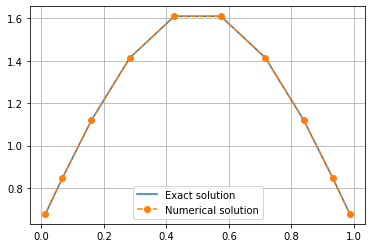

In [2]:
from scipy.special import roots_sh_legendre
import numpy as np
import matplotlib.pyplot as plt
import math

K = 1
def g(x):
    return math.sin(math.pi*x)

def Fredholm_slove(K, g, n, lam=1/2):
    A = np.zeros((n, n))
    b = np.zeros((n))
    roots, mu = roots_sh_legendre(n, mu=False)
    k = lam*np.ones((n,n))
    A = mu * k - np.eye(n)
    b = - np.sin(np.pi * roots)
    return roots, np.linalg.solve(A, b)

def f2(x):
    n = (x.shape[0])
    y = np.zeros(n)
    for i in range(n): y[i] = math.sin(math.pi*x[i]) + 2/math.pi
    return y

def find_best_numofnodes():
    eps = 1
    eps1 = 0
    n = 2
    roots, numerical = Fredholm_slove(K, g, n, lam=1/2)
    exact = f2(roots)
    while eps1 < eps:
        eps = np.linalg.norm(exact - numerical)
        roots, numerical = Fredholm_slove(K, g, n+1, lam=1/2)
        exact = f2(roots)
        eps1 = np.linalg.norm(exact - numerical)
        #print(f"number of nodes = {n}, norm between numerical and exact solution = {eps}")
        n+=1
        
    return (n-1), roots, numerical

def newplot(x, y, n):
    plt.figure()
    plt.plot(x, f2(x), label='Exact solution')
    plt.plot(x, y, 'o--', label='Numerical solution')
    plt.legend()
    plt.grid(True)

#Находим наилучшее число узлов в терминах нормы разницы численного и точного решений
n, roots, numerical = find_best_numofnodes()
print(f"best nodes number = {n}")
print()
print("<=EXACT AND NUMERICAL SOLUTIONS=>")
newplot(roots, numerical, n)

### Task 2.2
(20% of the grade)

An obvious issue with the privious result for $f(x)$ that it returns the solution on a fixed set of points. We do not control precise positions of these points.

1. First, let's try to interpolate the values obtained in the previous task to a uniform grid of length 50. You may use any interpolation method. Compare the interpolation values with exact solution values.

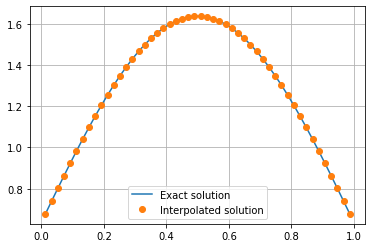

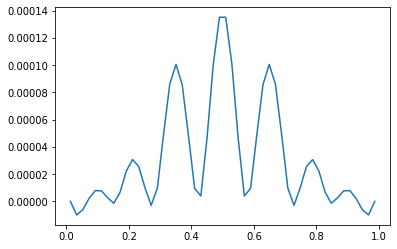

In [3]:
from scipy.interpolate import interp1d

x = np.linspace(roots[0], roots[-1], 50)
f_interp = interp1d(roots, numerical, kind='cubic')

plt.figure()
plt.plot(x, f2(x), label='Exact solution')
plt.plot(x, f_interp(x), 'o', label='Interpolated solution')
plt.legend()
plt.grid(True)

plt.figure()
plt.plot(x, f2(x)-f_interp(x), label='Difference between exact and interpolated solution')

Here we can see that numerical solution fits exact best on the roots of polynomial and deviates when argument goes away from these points

2. Now use the following formula to calculate the function at points of the same uniform grid.
$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$
Again, compare the interpolation values with the exact solution values, and also with the direct interpolation method.

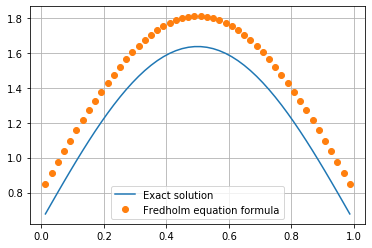

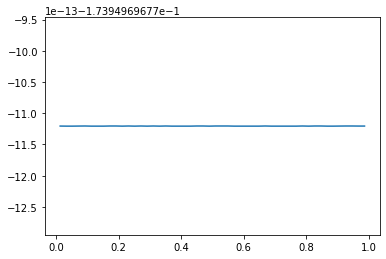

In [11]:
def f0(x, lam=1/2):
    f1 = 0
    
    n = roots.shape[0]
    for i in range(n): f1+=K*(mu*numerical)[i]
    f1*=lam*f1 
    
    N = x.shape[0]
    f0 = np.zeros(N)
    for i in range(N): 
        f0[i] = g(x[i])
    f0+=np.ones(N)*f1
    
    return f0

n = 9
roots, numerical = Fredholm_slove(K, g, n, lam=1/2)
mu = roots_sh_legendre(n, mu=False)[1]
plt.plot(x, f2(x), label='Exact solution')
plt.plot(x, f0(x), 'o', label='Fredholm equation formula')
plt.legend()
plt.grid(True)

plt.figure()
plt.plot(x, f2(x)-f0(x), label='Difference between exact and interpolated solution')

In [ ]:
Долго пытался, но так и не смог понять, почему точная формула не сработала